In [166]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

In [167]:
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [168]:
print(train_images.shape[1:])
dimData = np.prod(train_images.shape[1:])
dimData

(28, 28)


784

In [169]:
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data  =  test_images.reshape(test_images.shape[0], dimData)
train_data.shape, test_data.shape


((60000, 784), (10000, 784))

In [170]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
# scale values between 0 and 1
#train_data /=255.0
#test_data /=255.0

In [171]:
#change the labels from integer to one-hot encoding. 
# to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [172]:
len(train_labels), train_labels_one_hot

(60000,
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32))

In [173]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
#model.add(Dense(512, activation='relu'))

# model.add(Dense(512, activation='tanh'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='sigmoid'))

model.add(Dense(10, activation='softmax'))


In [174]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [175]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 4s 15ms/step - loss: 8.0582 - accuracy: 0.8808 - val_loss: 1.3744 - val_accuracy: 0.9273
Epoch 2/10
235/235 [==============================] - 3s 15ms/step - loss: 0.7979 - accuracy: 0.9524 - val_loss: 0.7818 - val_accuracy: 0.9514
Epoch 3/10
235/235 [==============================] - 3s 14ms/step - loss: 0.4398 - accuracy: 0.9661 - val_loss: 0.6120 - val_accuracy: 0.9630
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.3156 - accuracy: 0.9741 - val_loss: 0.7817 - val_accuracy: 0.9632
Epoch 5/10
235/235 [==============================] - 3s 14ms/step - loss: 0.2927 - accuracy: 0.9779 - val_loss: 0.7328 - val_accuracy: 0.9650
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.2476 - accuracy: 0.9812 - val_loss: 0.6674 - val_accuracy: 0.9707
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 0.2132 - accuracy: 0.9841 - val_loss: 0.8365 - val_accuracy: 0.9689

In [176]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


313/313 [==============================] - 1s 2ms/step - loss: 0.8365 - accuracy: 0.9731
Evaluation result on Test Data : Loss = 0.8365007638931274, accuracy = 0.9731000065803528


In [144]:
pred= model.predict_classes(test_data[0].reshape(1,784))


In [145]:
pred

array([7], dtype=int64)

In [146]:
test_labels[0]

7

In [147]:
from matplotlib import pyplot as plt
%matplotlib inline

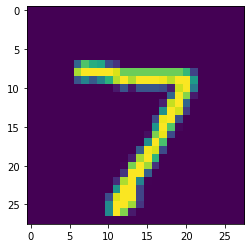

In [148]:
plt.imshow(test_data[0].reshape(28,28))


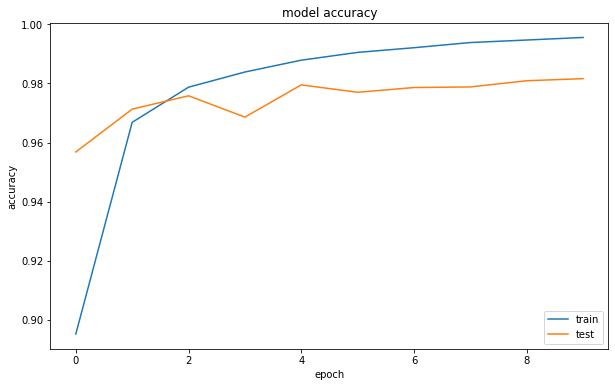

In [149]:
# question 1
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

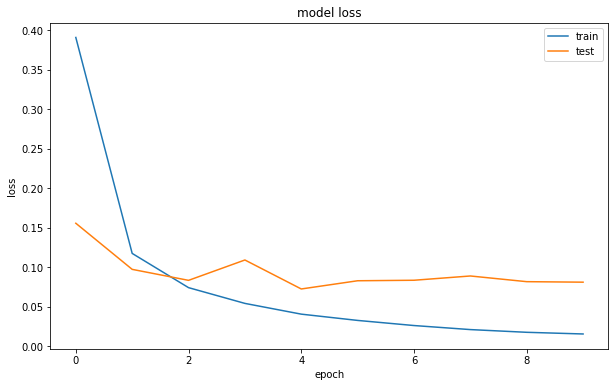

In [150]:
# using history object for plotting loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

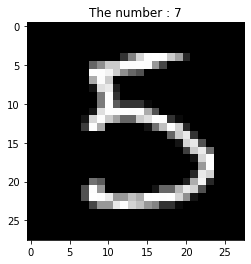

In [151]:
# question 2
plt.imshow(test_images[15, :, :], cmap='gray')
plt.title('The number : {}'.format(test_labels[0]))
plt.show()


In [152]:
predict_test = model.predict_classes(test_data[[15], :])
print("The prediction of the 15th in the test dataset is: ", predict_test)
#predict_test.argmax()

The prediction of the 15th in the test dataset is:  [5]


In [153]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


313/313 [==============================] - 1s 4ms/step - loss: 0.0808 - accuracy: 0.9816
Evaluation result on Test Data : Loss = 0.0808083713054657, accuracy = 0.9815999865531921


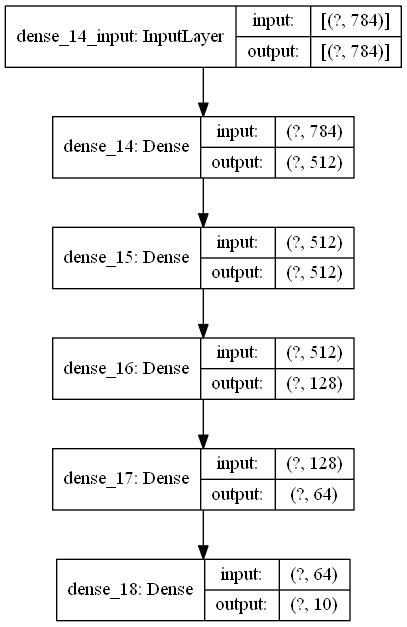

In [154]:
from tensorflow import keras
#keras.utils.plot_model(model, 'model.png')
keras.utils.plot_model(model, 'model_shapes.png', show_shapes=True)
